In [ ]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  #to ignore warnings

In [ ]:
plt.close('all')     #to close all running pyplot windows

# **Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**

In [ ]:
#import dataset
df = pd.read_csv('https://drive.google.com/uc?id=12J5o4AC1YdL-UrDYvUnfi5zoPZ5nISUZ&export=download')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape   #shape of data

(180, 9)

there are 180 records and 9 columns in data

In [ ]:
df.info()    #check data type of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Product,Gender and Marital Status are categorical values

Age,Education,Usage,Fitness,Income and Miles are Numerical Values

In [ ]:
df.isnull().sum()     #checks null or missing value in data

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


there is no missing values that means data is clean

In [ ]:
df.duplicated().sum()   #check duplicate values

np.int64(0)

There is no duplicate value in data

In [ ]:
df.nunique()   #check no of unique values in dataset

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [ ]:
df_product_count=df['Product'].value_counts().reset_index()    # total count of each type of product
df_product_count.columns=['Product','Count']
df_product_count

,Product,Count
0,KP281,80
1,KP481,60
2,KP781,40


There are 3 type of Products:

1.   KP281
2.   KP481
3.   KP781








In [ ]:
df_maritalstatus_count=df['MaritalStatus'].value_counts().reset_index()  #total count of each martial status
df_maritalstatus_count.columns=['MaritalStatus','Count']
df_maritalstatus_count

,MaritalStatus,Count
0,Partnered,107
1,Single,73


Marital Status divided into 2 types:

1.  Single
2.  Partnered



In [ ]:
df_gender_count=df['Gender'].value_counts().reset_index()    # total count of each gender
df_gender_count.columns=['Gender','Count']
df_gender_count

,Gender,Count
0,Male,104
1,Female,76


# **Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)**

In [ ]:
df.describe()   #describe the numerical data

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


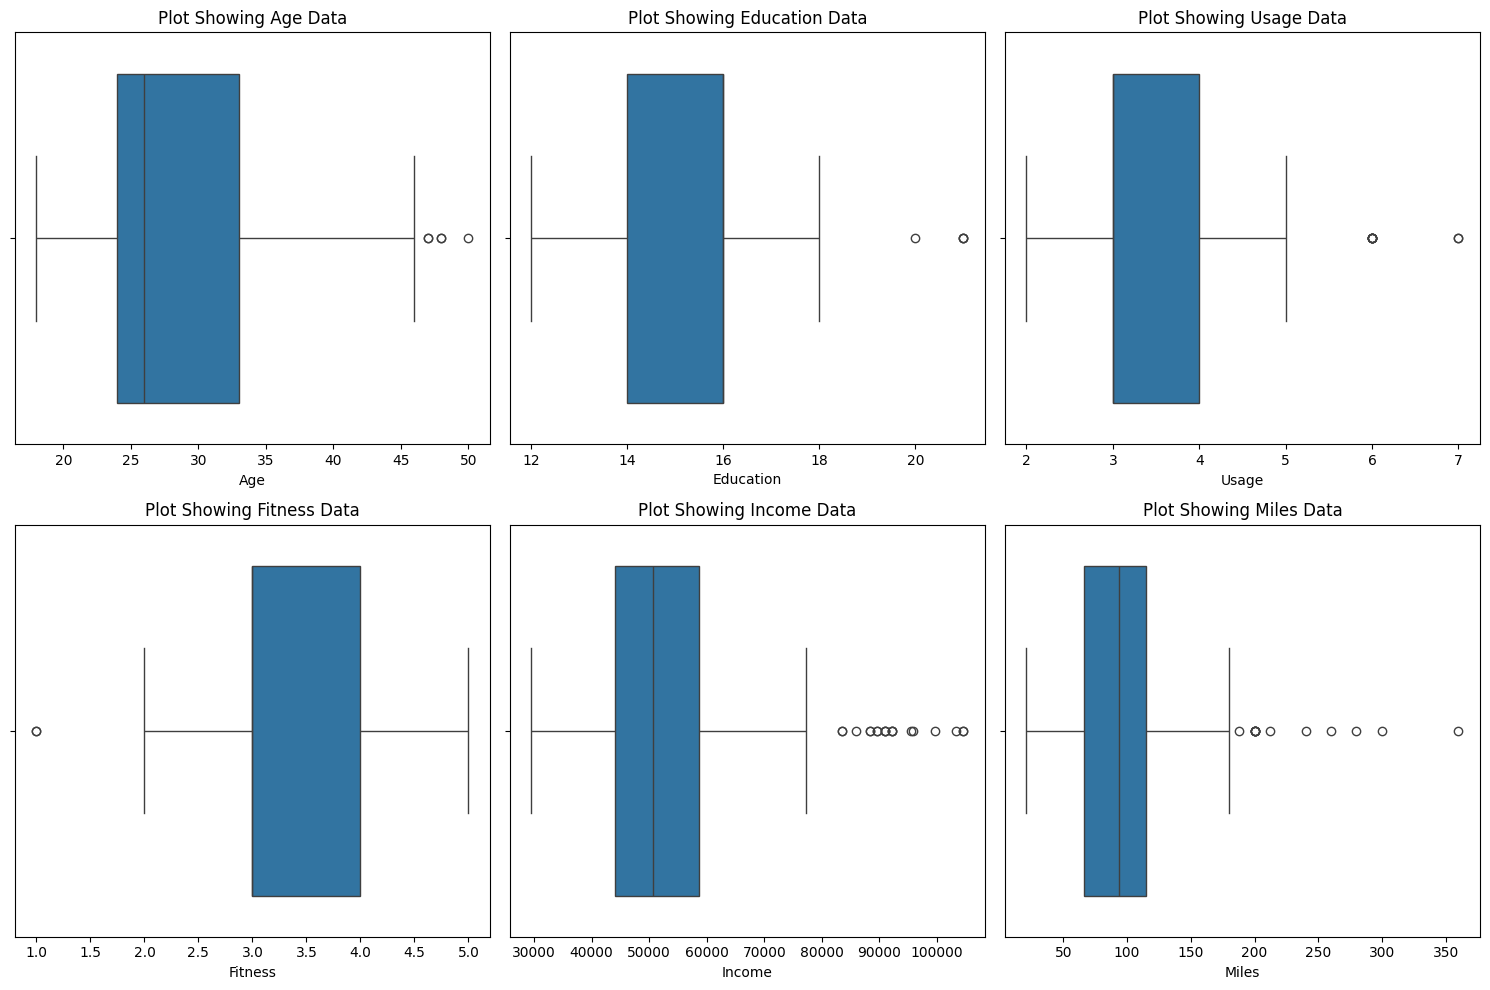

In [ ]:
# Using Boxplot visualizing data

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxplot(df['Age'],orient='h')
plt.title("Plot Showing Age Data")

plt.subplot(2,3,2)
sns.boxplot(df['Education'],orient='h')
plt.title("Plot Showing Education Data")

plt.subplot(2,3,3)
sns.boxplot(df['Usage'],orient='h')
plt.title("Plot Showing Usage Data")

plt.subplot(2,3,4)
sns.boxplot(df['Fitness'],orient='h')
plt.title("Plot Showing Fitness Data")

plt.subplot(2,3,5)
sns.boxplot(df['Income'],orient='h')
plt.title("Plot Showing Income Data")

plt.subplot(2,3,6)
sns.boxplot(df['Miles'],orient='h')
plt.title("Plot Showing Miles Data")

plt.tight_layout()
plt.show()

In [ ]:
#Detect Outlier in Age
print("Detect Outliers in Age")

age_25=df['Age'].quantile(0.25)
print("age_25:",age_25)    #25% data
age_50=df['Age'].quantile(0.50)   #50% data
print("age_50:",age_50)
age_75=df['Age'].quantile(0.75)   #75% data
print("age_75:",age_75)
print("*"*100)
IQR_Age=age_75-age_25
print("IQR_Age: ",IQR_Age)    #Calculate IQR(Interquartile Range)

print("*"*100)
#lower and upper bounds for outlier
lower_bound_age=age_25-1.5*IQR_Age
upper_bound_age=age_75+1.5*IQR_Age
print("lower_bound:",lower_bound_age)
print("upper_bound:",upper_bound_age)
print("*"*100)

#Identify Outliers in Age
outliers_age=df[(df['Age']<lower_bound_age) | (df['Age']>upper_bound_age)]
print("Outliers in Age:")
print(outliers_age)
print("*"*100)

#Differnce b/w Mean and Median

mean_age=df['Age'].mean()
median_age=df['Age'].median()
difference=mean_age-median_age
print("Difference between mean and median Age:",difference)




Detect Outliers in Age
age_25: 24.0
age_50: 26.0
age_75: 33.0
****************************************************************************************************
IQR_Age:  9.0
****************************************************************************************************
lower_bound: 10.5
upper_bound: 46.5
****************************************************************************************************
Outliers in Age:
    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
78    KP281   47    Male         16     Partnered      4        3   56850   
79    KP281   50  Female         16     Partnered      3        3   64809   
139   KP481   48    Male         16     Partnered      2        3   57987   
178   KP781   47    Male         18     Partnered      4        5  104581   
179   KP781   48    Male         18     Partnered      4        5   95508   

     Miles  
78      94  
79      66  
139     64  
178    120  
179    180  
***************************

In [ ]:
#Detect Outlier in Education
print("Detect Outliers in Education")


Education_25=df['Education'].quantile(0.25)
print("Education_25:",Education_25)    #25% data
Education_50=df['Education'].quantile(0.50)   #50% data
print("Education_50:",Education_50)
Education_75=df['Education'].quantile(0.75)   #75% data
print("Education_75:",Education_75)
print("*"*100)
IQR_Education=Education_75-Education_25
print("IQR_Education: ",IQR_Education)    #Calculate IQR(Interquartile Range)

print("*"*100)
#lower and upper bounds for outlier
lower_bound_Education=Education_25-1.5*IQR_Education
upper_bound_Education=Education_75+1.5*IQR_Education
print("lower_bound:",lower_bound_Education)
print("upper_bound:",upper_bound_Education)
print("*"*100)

#Identify Outliers in Education
outliers_Education=df[(df['Education']<lower_bound_Education) | (df['Education']>upper_bound_Education)]
print("Outliers in Education:")
print(outliers_Education)
print("*"*100)

#Differnce b/w Mean and Median

mean_Education=df['Education'].mean()
median_Education=df['Education'].median()
print("mean_Education:",mean_Education)
print("median_Education:",median_Education)
difference=mean_Education-median_Education
print("Difference between mean and median Education:",difference)



Detect Outliers in Education
Education_25: 14.0
Education_50: 16.0
Education_75: 16.0
****************************************************************************************************
IQR_Education:  2.0
****************************************************************************************************
lower_bound: 11.0
upper_bound: 19.0
****************************************************************************************************
Outliers in Education:
    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
156   KP781   25    Male         20     Partnered      4        5   74701   
157   KP781   26  Female         21        Single      4        3   69721   
161   KP781   27    Male         21     Partnered      4        4   90886   
175   KP781   40    Male         21        Single      6        5   83416   

     Miles  
156    170  
157    100  
161    100  
175    200  
*********************************************************************************

In [ ]:
#Detect Outlier in Usage
print("Detect Outliers in Usage")


Usage_25=df['Usage'].quantile(0.25)
print("Usage_25:",Usage_25)    #25% data
Usage_50=df['Usage'].quantile(0.50)   #50% data
print("Usage_50:",Usage_50)
Usage_75=df['Usage'].quantile(0.75)   #75% data
print("Usage_75:",Usage_75)
print("*"*100)
IQR_Usage=Usage_75-Usage_25
print("IQR_Usage: ",IQR_Usage)    #Calculate IQR(Interquartile Range)

print("*"*100)
#lower and upper bounds for outlier
lower_bound_Usage=Usage_25-1.5*IQR_Usage
upper_bound_Usage=Usage_75+1.5*IQR_Usage
print("lower_bound:",lower_bound_Usage)
print("upper_bound:",upper_bound_Usage)
print("*"*100)

#Identify Outliers in Usage
outliers_Usage=df[(df['Usage']<lower_bound_Usage) | (df['Usage']>upper_bound_Usage)]
print("Outliers in Usage:")
print(outliers_Usage)
print("*"*100)

#Differnce b/w Mean and Median

mean_Usage=df['Usage'].mean()
median_Usage=df['Usage'].median()
print("mean_Usage:",mean_Usage)
print("median_Usage:",median_Usage)
difference=mean_Usage-median_Usage
print("Difference between mean and median Usage:",difference)



Detect Outliers in Usage
Usage_25: 3.0
Usage_50: 3.0
Usage_75: 4.0
****************************************************************************************************
IQR_Usage:  1.0
****************************************************************************************************
lower_bound: 1.5
upper_bound: 5.5
****************************************************************************************************
Outliers in Usage:
    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
154   KP781   25    Male         18     Partnered      6        4   70966   
155   KP781   25    Male         18     Partnered      6        5   75946   
162   KP781   28  Female         18     Partnered      6        5   92131   
163   KP781   28    Male         18     Partnered      7        5   77191   
164   KP781   28    Male         18        Single      6        5   88396   
166   KP781   29    Male         14     Partnered      7        5   85906   
167   KP781   30  Fema

In [ ]:
#Detect Outlier in Fitness
print("Detect Outliers in Fitness")


Fitness_25=df['Fitness'].quantile(0.25)
print("Fitness_25:",Fitness_25)    #25% data
Fitness_50=df['Fitness'].quantile(0.50)   #50% data
print("Fitness_50:",Fitness_50)
Fitness_75=df['Fitness'].quantile(0.75)   #75% data
print("Fitness_75:",Fitness_75)
print("*"*100)
IQR_Fitness=Fitness_75-Fitness_25
print("IQR_Fitness: ",IQR_Fitness)    #Calculate IQR(Interquartile Range)

print("*"*100)
#lower and upper bounds for outlier
lower_bound_Fitness=Fitness_25-1.5*IQR_Fitness
upper_bound_Fitness=Fitness_75+1.5*IQR_Fitness
print("lower_bound:",lower_bound_Fitness)
print("upper_bound:",upper_bound_Fitness)
print("*"*100)

#Identify Outliers in Fitness
outliers_Fitness=df[(df['Fitness']<lower_bound_Fitness) | (df['Fitness']>upper_bound_Fitness)]
print("Outliers in Fitness:")
print(outliers_Fitness)
print("*"*100)

#Differnce b/w Mean and Median

mean_Fitness=df['Fitness'].mean()
median_Fitness=df['Fitness'].median()
print("mean_Fitness:",mean_Fitness)
print("median_Fitness:",median_Fitness)
difference=mean_Fitness-median_Fitness
print("Difference between mean and median Fitness:",difference)



Detect Outliers in Fitness
Fitness_25: 3.0
Fitness_50: 3.0
Fitness_75: 4.0
****************************************************************************************************
IQR_Fitness:  1.0
****************************************************************************************************
lower_bound: 1.5
upper_bound: 5.5
****************************************************************************************************
Outliers in Fitness:
    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
14    KP281   23    Male         16     Partnered      3        1   38658   
117   KP481   31  Female         18        Single      2        1   65220   

     Miles  
14      47  
117     21  
****************************************************************************************************
mean_Fitness: 3.311111111111111
median_Fitness: 3.0
Difference between mean and median Fitness: 0.3111111111111109


In [ ]:
#Detect Outlier in Income
print("Detect Outliers in Income")


Income_25=df['Income'].quantile(0.25)
print("Income_25:",Income_25)    #25% data
Income_50=df['Income'].quantile(0.50)   #50% data
print("Income_50:",Income_50)
Income_75=df['Income'].quantile(0.75)   #75% data
print("Income_75:",Income_75)
print("*"*100)
IQR_Income=Income_75-Income_25
print("IQR_Income: ",IQR_Income)    #Calculate IQR(Interquartile Range)

print("*"*100)
#lower and upper bounds for outlier
lower_bound_Income=Income_25-1.5*IQR_Income
upper_bound_Income=Income_75+1.5*IQR_Income
print("lower_bound:",lower_bound_Income)
print("upper_bound:",upper_bound_Income)
print("*"*100)

#Identify Outliers in Income
outliers_Income=df[(df['Income']<lower_bound_Income) | (df['Income']>upper_bound_Income)]
print("Outliers in Income:")
print(outliers_Income)
print("*"*100)

#Differnce b/w Mean and Median

mean_Income=df['Income'].mean()
median_Income=df['Income'].median()
difference=mean_Income-median_Income
print("Difference between mean and median Income:",difference)



Detect Outliers in Income
Income_25: 44058.75
Income_50: 50596.5
Income_75: 58668.0
****************************************************************************************************
IQR_Income:  14609.25
****************************************************************************************************
lower_bound: 22144.875
upper_bound: 80581.875
****************************************************************************************************
Outliers in Income:
    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
159   KP781   27    Male         16     Partnered      4        5   83416   
160   KP781   27    Male         18        Single      4        3   88396   
161   KP781   27    Male         21     Partnered      4        4   90886   
162   KP781   28  Female         18     Partnered      6        5   92131   
164   KP781   28    Male         18        Single      6        5   88396   
166   KP781   29    Male         14     Partnered      7       

In [ ]:
#Detect Outlier in Miles
print("Detect Outliers in Miles")


Miles_25=df['Miles'].quantile(0.25)
print("Miles_25:",Miles_25)    #25% data
Miles_50=df['Miles'].quantile(0.50)   #50% data
print("Miles_50:",Miles_50)
Miles_75=df['Miles'].quantile(0.75)   #75% data
print("Miles_75:",Miles_75)
print("*"*100)
IQR_Miles=Miles_75-Miles_25
print("IQR_Miles: ",IQR_Miles)    #Calculate IQR(Interquartile Range)

print("*"*100)
#lower and upper bounds for outlier
lower_bound_Miles=Miles_25-1.5*IQR_Miles
upper_bound_Miles=Miles_75+1.5*IQR_Miles
print("lower_bound:",lower_bound_Miles)
print("upper_bound:",upper_bound_Miles)
print("*"*100)

#Identify Outliers in Miles
outliers_Miles=df[(df['Miles']<lower_bound_Miles) | (df['Miles']>upper_bound_Miles)]
print("Outliers in Miles:")
print(outliers_Miles)
print("*"*100)

#Differnce b/w Mean and Median

mean_Miles=df['Miles'].mean()
median_Miles=df['Miles'].median()
difference=mean_Miles-median_Miles
print("Difference between mean and median Miles:",difference)



Detect Outliers in Miles
Miles_25: 66.0
Miles_50: 94.0
Miles_75: 114.75
****************************************************************************************************
IQR_Miles:  48.75
****************************************************************************************************
lower_bound: -7.125
upper_bound: 187.875
****************************************************************************************************
Outliers in Miles:
    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
23    KP281   24  Female         16     Partnered      5        5   44343   
84    KP481   21  Female         14     Partnered      5        4   34110   
142   KP781   22    Male         18        Single      4        5   48556   
148   KP781   24  Female         16        Single      5        5   52291   
152   KP781   25  Female         18     Partnered      5        5   61006   
155   KP781   25    Male         18     Partnered      6        5   75946   
166   KP

Fitness has less outliers than others as its difference b/w mean and median is lowest(0.311) than others

Incomes has most outliers as its difference b/w mean and median is highest(3123.07) than others

Education has negative difference(-0.42) means outliers mostly on left side of distribution whereas positive difference means outliers mostly on right side of distribution

# **Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)**

In [ ]:
df['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [ ]:
#function for converting education into 4 categories

def edu_cat(x):
  if x<13:
    return "Lower School"
  elif x>=13 and x<=15:
    return "Middle School"
  elif x>15 and x<18:
    return "High School"
  else:
    return "College"

In [ ]:
df['Education_Cat']=df['Education'].apply(edu_cat)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Education_Cat
0,KP281,18,Male,14,Single,3,4,29562,112,Middle School
1,KP281,19,Male,15,Single,2,3,31836,75,Middle School
2,KP281,19,Female,14,Partnered,4,3,30699,66,Middle School
3,KP281,19,Male,12,Single,3,3,32973,85,Lower School
4,KP281,20,Male,13,Partnered,4,2,35247,47,Middle School


In [ ]:
df['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [ ]:
#function for converting Usage into 4 categories

def usage_cat(x):
  if x<=3:
    return "Infrequent"
  elif x==4:
    return "Moderate"
  elif x==5:
    return "Regular"
  else:
    return "Dedicated"

In [ ]:
df['Usage_Cat']=df['Usage'].apply(usage_cat)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Education_Cat,Usage_Cat
0,KP281,18,Male,14,Single,3,4,29562,112,Middle School,Infrequent
1,KP281,19,Male,15,Single,2,3,31836,75,Middle School,Infrequent
2,KP281,19,Female,14,Partnered,4,3,30699,66,Middle School,Moderate
3,KP281,19,Male,12,Single,3,3,32973,85,Lower School,Infrequent
4,KP281,20,Male,13,Partnered,4,2,35247,47,Middle School,Moderate


In [ ]:
df['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [ ]:
#function for converting fitness into 3 categories

def fitness_cat(x):
  if x<=2:
    return "Poor Fitness"
  elif x==3:
    return "Good Fitness"
  else:
    return "Excellent Fitness"

In [ ]:
df['Fitness_Cat']=df['Fitness'].apply(fitness_cat)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Education_Cat,Usage_Cat,Fitness_Cat
0,KP281,18,Male,14,Single,3,4,29562,112,Middle School,Infrequent,Excellent Fitness
1,KP281,19,Male,15,Single,2,3,31836,75,Middle School,Infrequent,Good Fitness
2,KP281,19,Female,14,Partnered,4,3,30699,66,Middle School,Moderate,Good Fitness
3,KP281,19,Male,12,Single,3,3,32973,85,Lower School,Infrequent,Good Fitness
4,KP281,20,Male,13,Partnered,4,2,35247,47,Middle School,Moderate,Poor Fitness


In [ ]:
# creating bins to categorize age
bins = [0,20,25,30,35,40,55]
labels = ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_Cat'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Education_Cat,Usage_Cat,Fitness_Cat,Age_Cat
0,KP281,18,Male,14,Single,3,4,29562,112,Middle School,Infrequent,Excellent Fitness,<20
1,KP281,19,Male,15,Single,2,3,31836,75,Middle School,Infrequent,Good Fitness,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,Middle School,Moderate,Good Fitness,<20
3,KP281,19,Male,12,Single,3,3,32973,85,Lower School,Infrequent,Good Fitness,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,Middle School,Moderate,Poor Fitness,<20


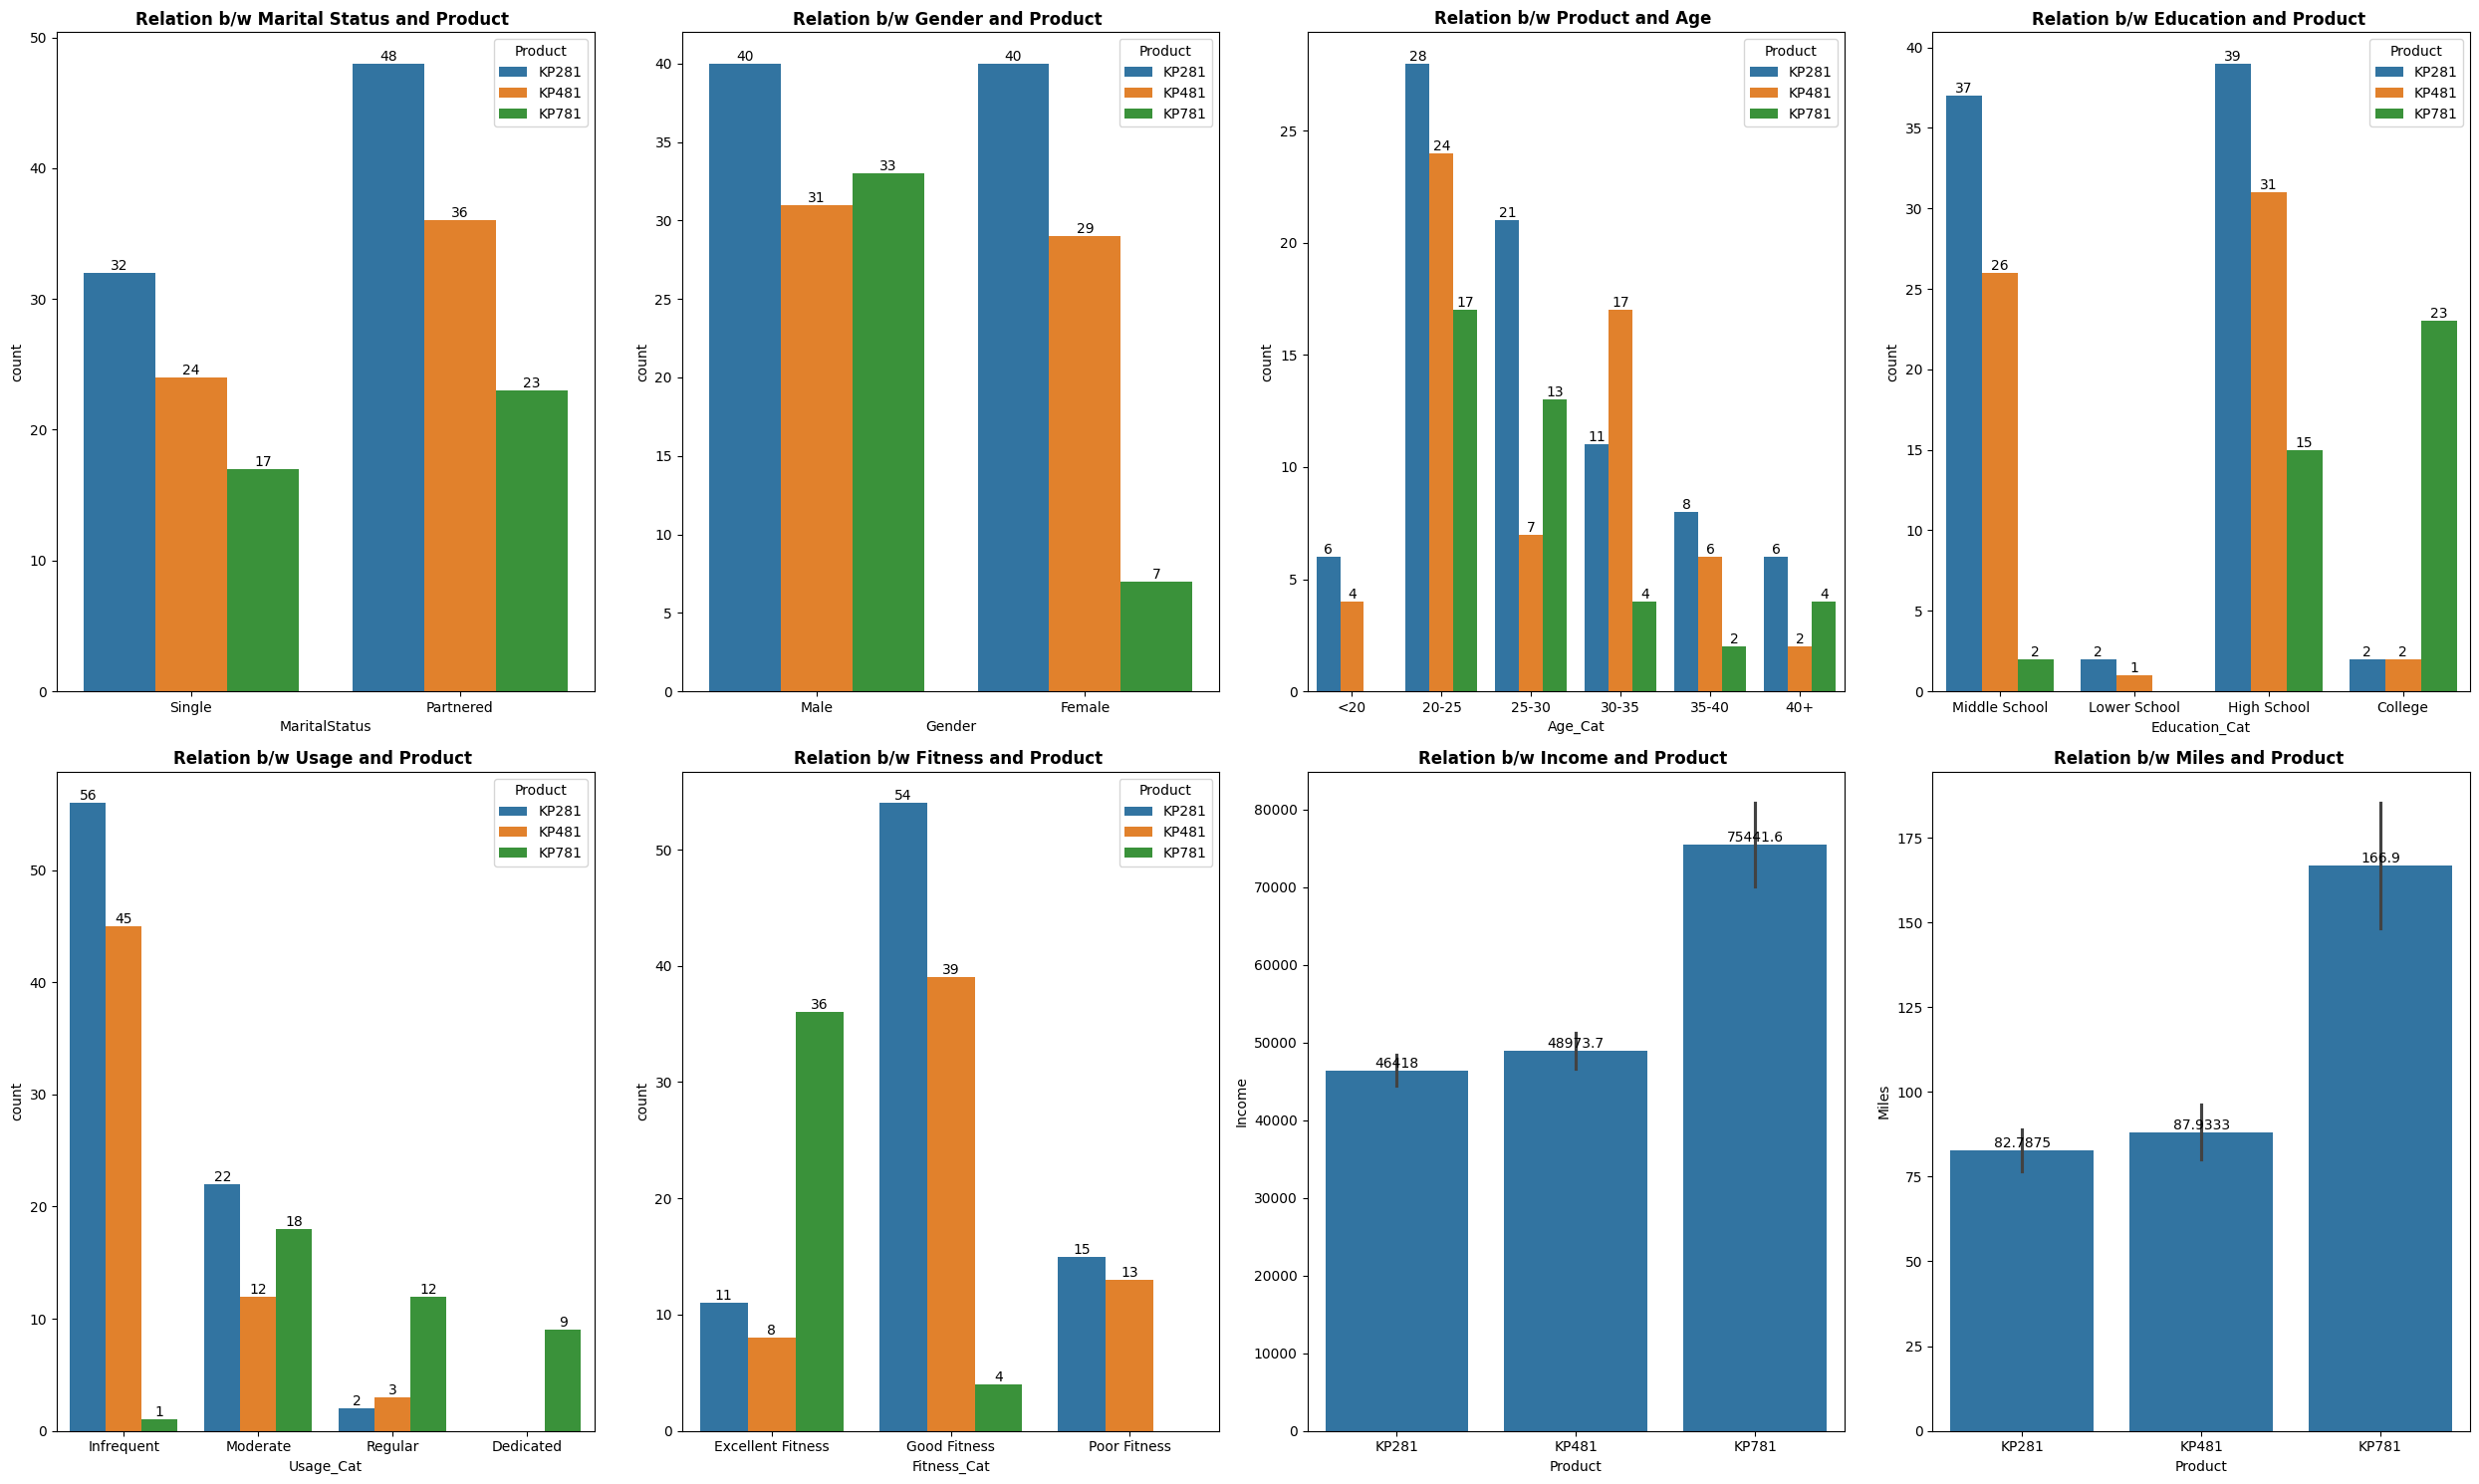

In [ ]:
# Show Relation b/w Product with different categoriess and check their effect by visualization

plt.figure(figsize=(25,15))   #figure size

plt.subplot(2,4,1)
ax1=sns.countplot(x=df['MaritalStatus'],hue=df['Product'])
plt.title("Relation b/w Marital Status and Product ",fontweight='bold')
for container in ax1.containers:
  ax1.bar_label(container)

plt.subplot(2,4,2)
ax2=sns.countplot(x=df['Gender'],hue=df['Product'])
plt.title("Relation b/w Gender and Product ",fontweight='bold')
for container in ax2.containers:
  ax2.bar_label(container)

plt.subplot(2,4,3)
ax3=sns.countplot(x='Age_Cat',hue='Product',data=df)
plt.title("Relation b/w Product and Age ",fontweight='bold')
for container in ax3.containers:
  ax3.bar_label(container)

plt.subplot(2,4,4)
ax4=sns.countplot(x=df['Education_Cat'],hue=df['Product'])
plt.title("Relation b/w Education and Product ",fontweight='bold')
for container in ax4.containers:
  ax4.bar_label(container)

plt.subplot(2,4,5)
ax5=sns.countplot(x=df['Usage_Cat'],hue=df['Product'])
plt.title("Relation b/w Usage and Product ",fontweight='bold')
for container in ax5.containers:
  ax5.bar_label(container)

plt.subplot(2,4,6)
ax6=sns.countplot(x=df['Fitness_Cat'],hue=df['Product'])
plt.title("Relation b/w Fitness and Product ",fontweight='bold')
for container in ax6.containers:
  ax6.bar_label(container)

plt.subplot(2,4,7)
ax7=sns.barplot(x=df['Product'],y=df['Income'])
plt.title("Relation b/w Income and Product ",fontweight='bold')
for container in ax7.containers:
  ax7.bar_label(container)

plt.subplot(2,4,8)
ax8=sns.barplot(x=df['Product'],y=df['Miles'])
plt.title("Relation b/w Miles and Product ",fontweight='bold')
for container in ax8.containers:
  ax8.bar_label(container)


plt.tight_layout()
plt.show()

People are partnered is likely to purchase a product then the people who are not.

Product KP281 is popular in both the genders.KP481 is popular higher in males as compare to females.KP781 is popular only in males.

People of age group 20-25 purchase more number of treadmills.
- 80% of purchasers are from 20 to 35 age group.
- 62% of purchases are from age group of 20-30 years

As per the education Middle school and high school likely to purchase the KP281 and KP481. College likely to purchase only KP781. Lower education is shouldn't be a traget audience as there is less chance that they will purchase a Treadmill
- Approx 83% people purchasers from Middle and High School group
- Less than 2% people purchasers from Lower School group

People who are infrequent user likely to purchase KP281 and KP481 and people are dedicated would purchase KP781. Rest of the class would randomly purchase any of the treadmill.

People who have Excellent fitness would purchase KP781 and people with Fair Fitness and Poor Fitness will purchase KP281 and KP481

People with high income would love to purchase the KP781 and lower to middle income group would love to purchase KP281 and KP481
- People who have income under 50000 they like to purchase KP281 and KP481
- People who have income more then 50000 they like purchase KP781

If the miles run is higher cutsomer likely to purchase KP781





# **Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)**

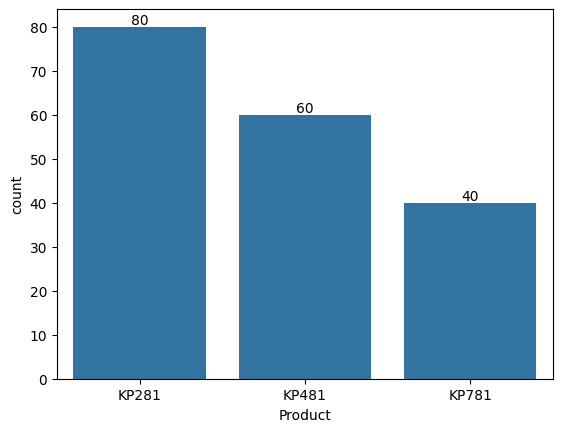

In [ ]:
ax=sns.countplot(x=df['Product'])
for container in ax.containers:
  ax.bar_label(container)
plt.show()

In [ ]:
product_count=pd.crosstab(index=df['Product'],columns='Count')
product_percentage=product_count/len(df)*100
product_percentage

col_0,Count
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


Probability of customers purchase KP281: ~0.44 or ~44%

Probability of customers purchase KP281: ~0.33 or ~33%

Probability of customers purchase KP281: ~0.22 or ~22%

# Check correlation among different factors using heat maps or pair plots.**bold text**

In [ ]:
df_copy=df.copy()
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Education_Cat,Usage_Cat,Fitness_Cat,Age_Cat
0,KP281,18,Male,14,Single,3,4,29562,112,Middle School,Infrequent,Excellent Fitness,<20
1,KP281,19,Male,15,Single,2,3,31836,75,Middle School,Infrequent,Good Fitness,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,Middle School,Moderate,Good Fitness,<20
3,KP281,19,Male,12,Single,3,3,32973,85,Lower School,Infrequent,Good Fitness,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,Middle School,Moderate,Poor Fitness,<20


In [ ]:
# changing categorical data to numerical to find correlation

df_copy['Product'].replace({'KP281':0,'KP481':1,'KP781':2},inplace=True)
df_copy['Gender'].replace({'Male':0,'Female':1},inplace=True)
df_copy['MaritalStatus'].replace({'Single':0,'Partnered':1},inplace=True)
df_copy.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Education_Cat,Usage_Cat,Fitness_Cat,Age_Cat
0,0,18,0,14,0,3,4,29562,112,Middle School,Infrequent,Excellent Fitness,<20
1,0,19,0,15,0,2,3,31836,75,Middle School,Infrequent,Good Fitness,<20
2,0,19,1,14,1,4,3,30699,66,Middle School,Moderate,Good Fitness,<20
3,0,19,0,12,0,3,3,32973,85,Lower School,Infrequent,Good Fitness,<20
4,0,20,0,13,1,4,2,35247,47,Middle School,Moderate,Poor Fitness,<20


In [ ]:
#dropping columns which not useful in finding correlation as these are redefining columns of previous ones

df_copy.drop(['Education_Cat','Fitness_Cat','Usage_Cat','Age_Cat'],axis=1,inplace=True)
df_copy.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,18,0,14,0,3,4,29562,112
1,0,19,0,15,0,2,3,31836,75
2,0,19,1,14,1,4,3,30699,66
3,0,19,0,12,0,3,3,32973,85
4,0,20,0,13,1,4,2,35247,47


In [ ]:
#correlation of data

df_copy.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,-0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,-0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,-0.230653,-0.027544,1.000000,-0.094089,0.018836,-0.214424,-0.254609,-0.202053,-0.217869
Education,0.495018,0.280496,-0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,-0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,-0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,-0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,-0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


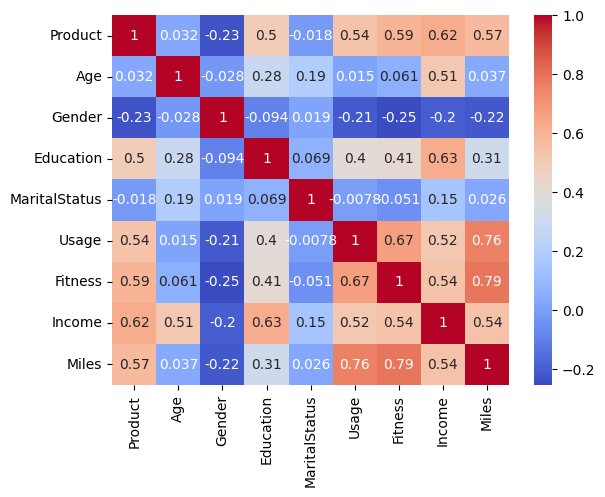

<Figure size 1500x1200 with 0 Axes>

In [ ]:
#Correlation Heatmap
sns.heatmap(df_copy.corr(),annot=True,cmap='coolwarm')
plt.figure(figsize=(15,12))
plt.show()

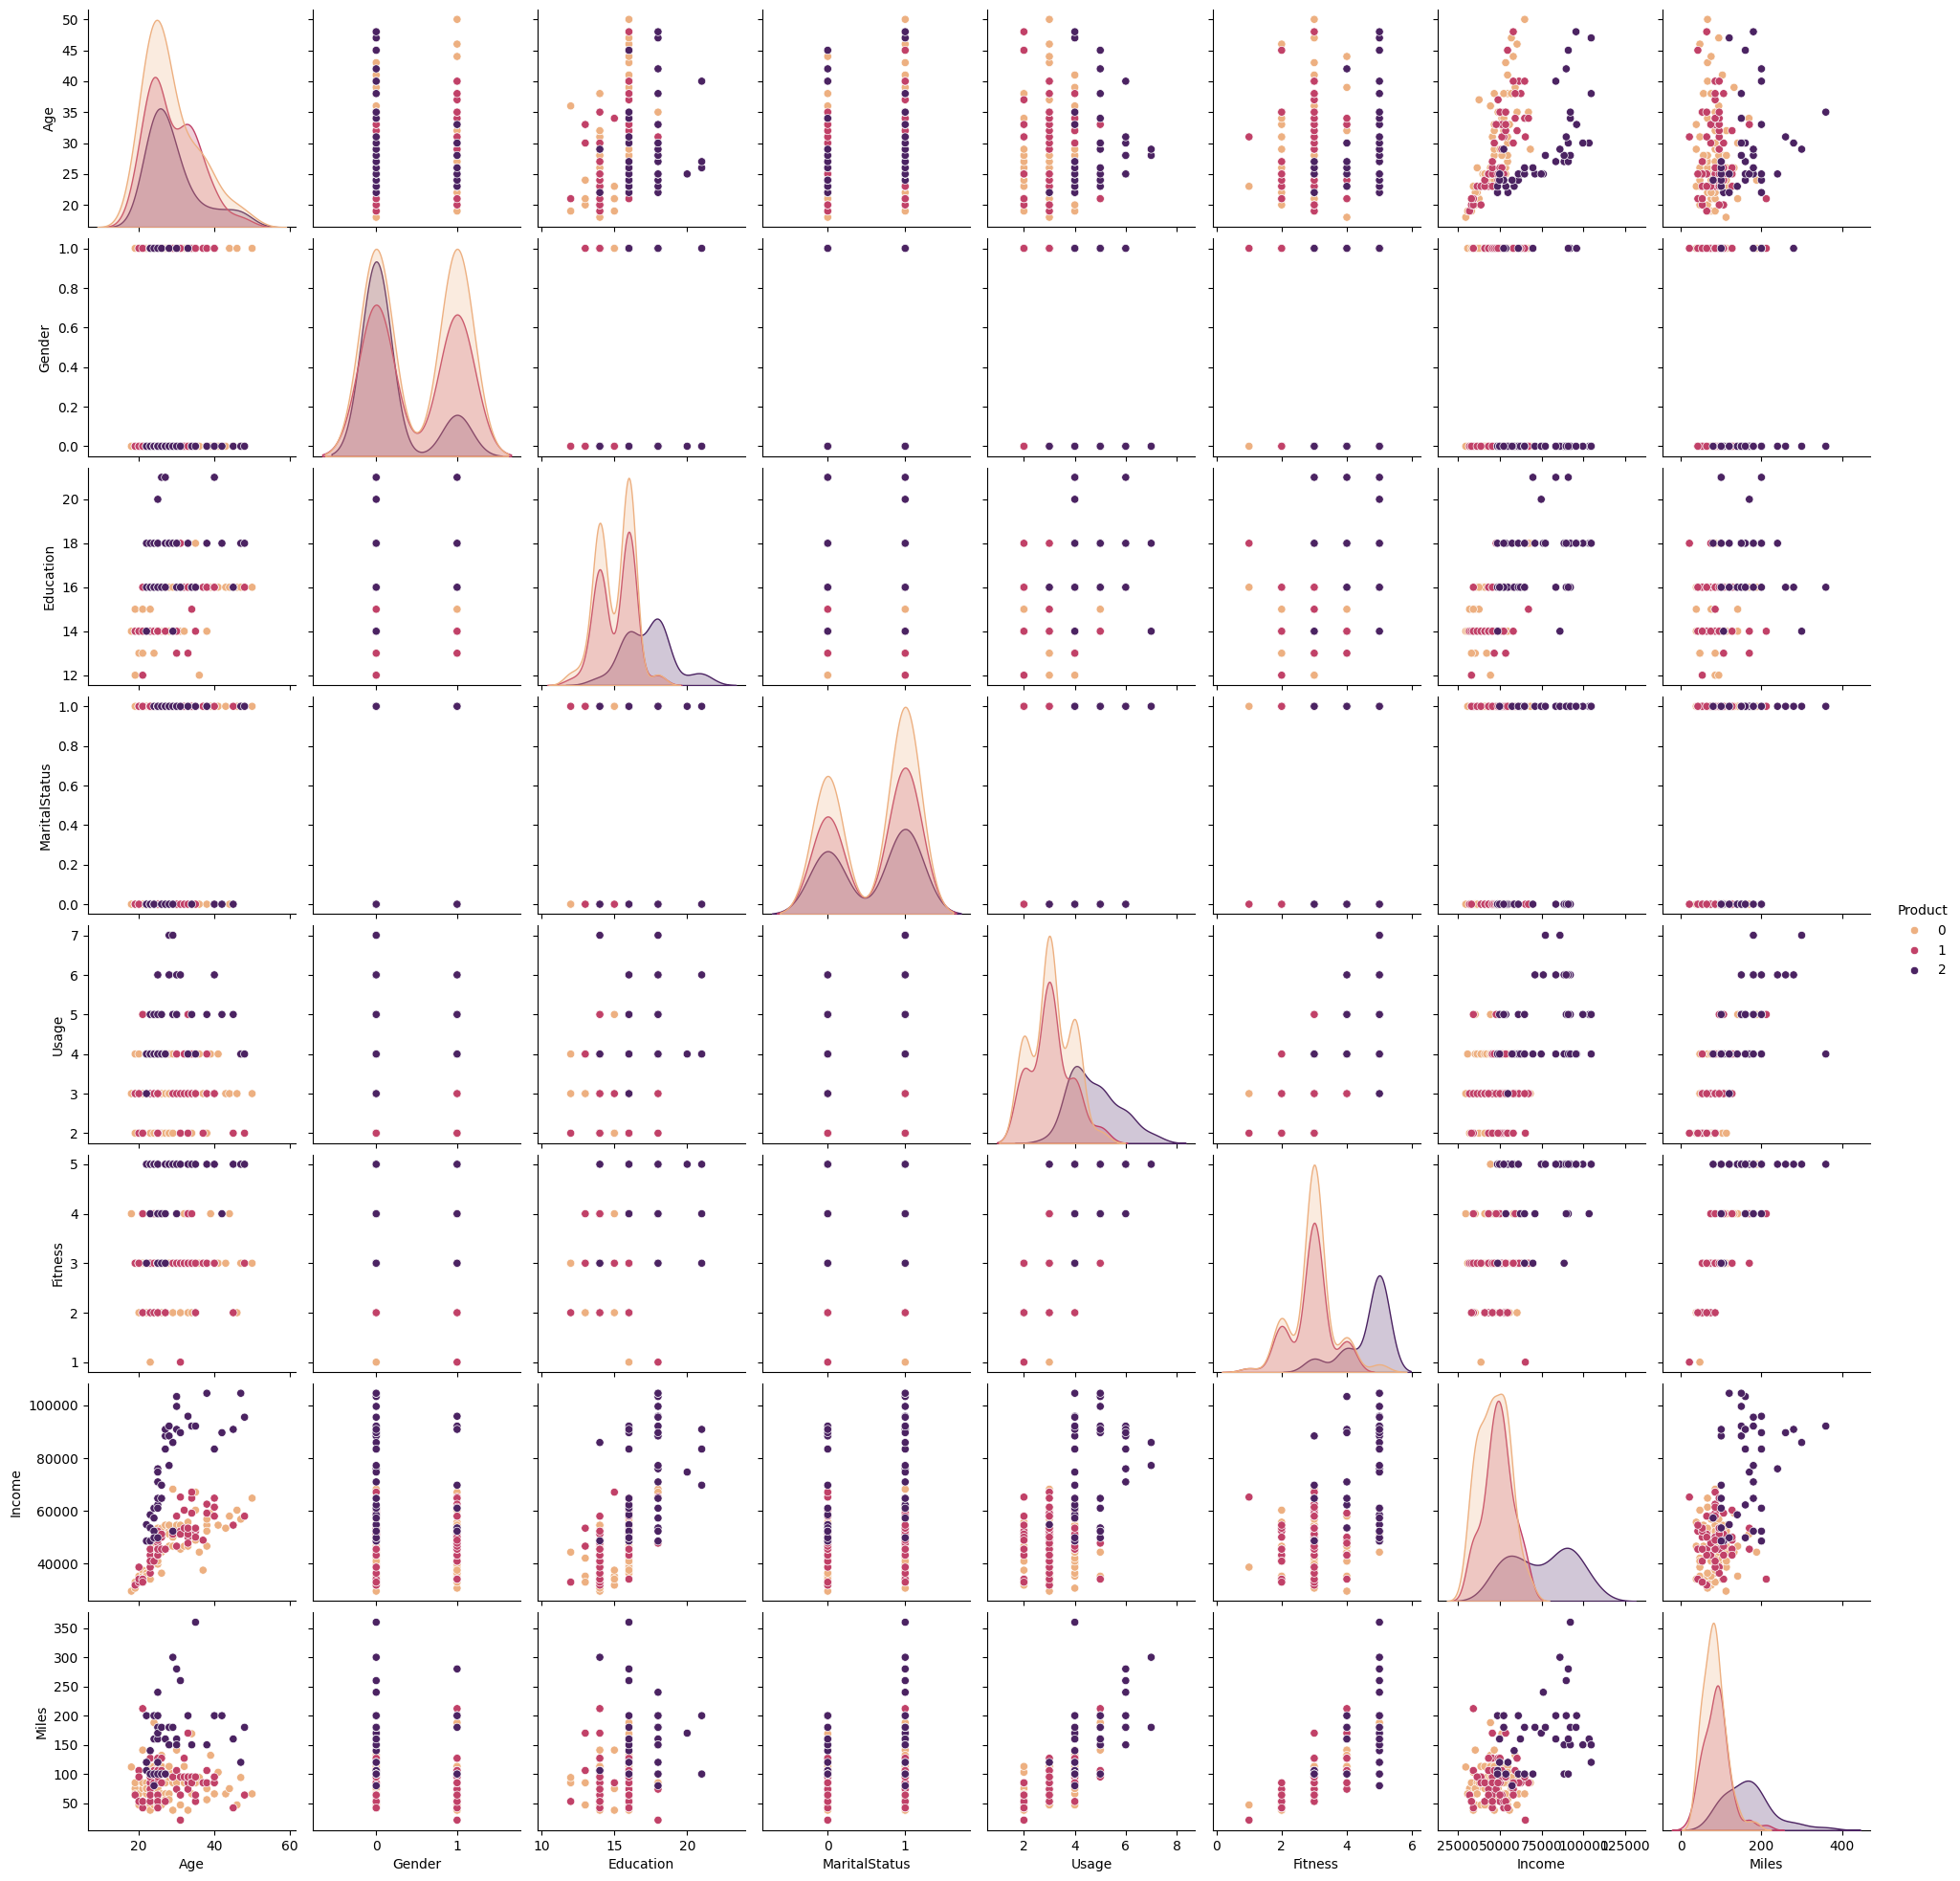

In [ ]:
#Pairplot
sns.pairplot(df_copy,hue='Product',palette='flare')
plt.show()

- Gender did not have any such correlation with other parameter that means it did not impact on purchasing.

- Educataion is highly correlated with income as its obvious. It also has impact on product purchased. Eductation also have significatnt correlation between fitness rating and Usage of the treadmill.

- Marital Status has smaller correlation between Age and Income.

- Usage is extremely correlated with Fitness and Miles and has a higher correlation with Income and Education as well.

- Income is highly correlated with Product and Education. It also had good correlation with Age, usage, Fitness, Miles.

- From above we can say that Product is extremely correlated with Income, Education, Fitness, Usage along with Miles.

# **With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?**

In [ ]:
#Using CrossTab finding what no of persons purchased as per their maritalstatus

status_cross=pd.crosstab(df['Product'],df['MaritalStatus'],normalize=True,margins=True)
status_cross

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


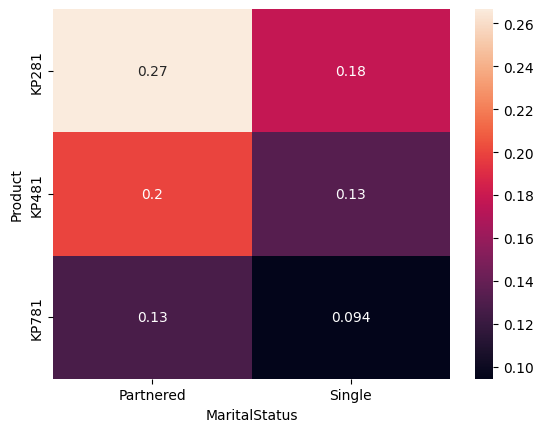

In [ ]:
sns.heatmap((pd.crosstab(df['Product'],df['MaritalStatus'],normalize=True)),annot=True)
plt.show()

In [ ]:
#What is the probability of customers are partnered using any product?

print("Probability of customers which are partnered using any product:",107/180)

#What is the probability of customers are single using any product?

print("Probability of customers which are single using any product:",73/180)

#Probability of customers which are partnered using each product
print("Probability of customers which are partnered and using product K281:",48/80)

print("Probability of customers which are partnered and using product K481:",36/60)

print("Probability of customers which are partnered and using product K781:",23/40)

#Probability of customers which are single using each product

print("Probability of customers which are single and using product K281:",32/80)

print("Probability of customers which are single and using product K481:",26/60)

print("Probability of customers which are single and using product K781:",17/40)


Probability of customers which are partnered using any product: 0.5944444444444444
Probability of customers which are single using any product: 0.40555555555555556
Probability of customers which are partnered and using product K281: 0.6
Probability of customers which are partnered and using product K481: 0.6
Probability of customers which are partnered and using product K781: 0.575
Probability of customers which are single and using product K281: 0.4
Probability of customers which are single and using product K481: 0.43333333333333335
Probability of customers which are single and using product K781: 0.425


Partnered customers using more than single customers

Partnered Customers use products K281 and K481 i.e. 60% more then K781 i.e.57.5%

Single Customers use products K481(~ 43%) and K781(~ 42.5%) more then K281

In [ ]:
#Using CrossTab finding what no of persons purchased as per their gender

gender_cross=pd.crosstab(df['Product'],df['Gender'],margins=True)
gender_cross


Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
print("Probability of male customers buy any product:",104/180)

print("Probability of female customers buy any product:",76/180)

print("Probability of male customers buying K281:",40/80)

print("Probability of male customers buying K481:",31/60)

print("Probability of male customers buying K781:",33/40)

print("Probability of female customers buying K281:",40/80)

print("Probability of female customers buying K481:",29/60)

print("Probability of female customers buying K781:",7/40)

Probability of male customers buy any product: 0.5777777777777777
Probability of female customers buy any product: 0.4222222222222222
Probability of male customers buying K281: 0.5
Probability of male customers buying K481: 0.5166666666666667
Probability of male customers buying K781: 0.825
Probability of female customers buying K281: 0.5
Probability of female customers buying K481: 0.48333333333333334
Probability of female customers buying K781: 0.175


In [ ]:
#Probability of partnered customers buying each product

total_customers=len(df)
print("Total Customers:",total_customers)
print("*"*100)

#KP281
male_pratnered_kp281=len(df[(df["Gender"]=="Male")&(df["MaritalStatus"]=="Partnered")&(df["Product"]=="KP281")])
print("Probability of male partnered customers buying K281:",male_pratnered_kp281/total_customers)

female_partnered_kp281=len(df[(df["Gender"]=="Female")&(df["MaritalStatus"]=="Partnered")&(df["Product"]=="KP281")])
print("Probability of female partnered customers buying K281:",female_partnered_kp281/total_customers)
print("*"*100)
#KP481
male_pratnered_kp481=len(df[(df["Gender"]=="Male")&(df["MaritalStatus"]=="Partnered")&(df["Product"]=="KP481")])
print("Probability of male partnered customers buying K481:",male_pratnered_kp481/total_customers)

female_partnered_kp481=len(df[(df["Gender"]=="Female")&(df["MaritalStatus"]=="Partnered")&(df["Product"]=="KP481")])
print("Probability of female partnered customers buying K481:",female_partnered_kp481/total_customers)
print("*"*100)


#KP781
male_pratnered_kp781=len(df[(df["Gender"]=="Male")&(df["MaritalStatus"]=="Partnered")&(df["Product"]=="KP781")])
print("Probability of male partnered customers buying K781:",male_pratnered_kp781/total_customers)

female_partnered_kp781=len(df[(df["Gender"]=="Female")&(df["MaritalStatus"]=="Partnered")&(df["Product"]=="KP781")])
print("Probability of female partnered customers buying K781:",female_partnered_kp781/total_customers)

Total Customers: 180
****************************************************************************************************
Probability of male partnered customers buying K281: 0.11666666666666667
Probability of female partnered customers buying K281: 0.15
****************************************************************************************************
Probability of male partnered customers buying K481: 0.11666666666666667
Probability of female partnered customers buying K481: 0.08333333333333333
****************************************************************************************************
Probability of male partnered customers buying K781: 0.10555555555555556
Probability of female partnered customers buying K781: 0.022222222222222223


K281: Female partnered customers buying more approx 15%

K481: Male Partnered customers buying more approx 11.6%

K781: Male Partnered customers buying more approx 10.5%

In [ ]:
#Probability of single customers buying each product

total_customers=len(df)
print("Total Customers:",total_customers)
print("*"*100)

#K281
male_single_kp281=len(df[(df["Gender"]=="Male")&(df["MaritalStatus"]=="Single")&(df["Product"]=="KP281")])
print("Probability of male single customers buying K281:",male_single_kp281/total_customers)

female_single_kp281=len(df[(df["Gender"]=="Female")&(df["MaritalStatus"]=="Single")&(df["Product"]=="KP281")])
print("Probability of female single customers buying K281:",female_single_kp281/total_customers)
print("*"*100)

#K481
male_single_kp481=len(df[(df["Gender"]=="Male")&(df["MaritalStatus"]=="Single")&(df["Product"]=="KP481")])
print("Probability of male single customers buying K481:",male_single_kp481/total_customers)

female_single_kp481=len(df[(df["Gender"]=="Female")&(df["MaritalStatus"]=="Single")&(df["Product"]=="KP481")])
print("Probability of female single customers buying K481:",female_single_kp481/total_customers)
print("*"*100)

#K781
male_single_kp781=len(df[(df["Gender"]=="Male")&(df["MaritalStatus"]=="Single")&(df["Product"]=="KP781")])
print("Probability of male single customers buying K781:",male_single_kp781/total_customers)

female_single_kp781=len(df[(df["Gender"]=="Female")&(df["MaritalStatus"]=="Single")&(df["Product"]=="KP781")])
print("Probability of female single customers buying K781:",female_single_kp781/total_customers)

Total Customers: 180
****************************************************************************************************
Probability of male single customers buying K281: 0.10555555555555556
Probability of female single customers buying K281: 0.07222222222222222
****************************************************************************************************
Probability of male single customers buying K481: 0.05555555555555555
Probability of female single customers buying K481: 0.07777777777777778
****************************************************************************************************
Probability of male single customers buying K781: 0.07777777777777778
Probability of female single customers buying K781: 0.016666666666666666


K281: Male Single customers buying more approx 10.5%

K481: Female Single customers buying more approx 7.7%

K781: Male Single customers buying more approx 7.7%

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Education_Cat,Usage_Cat,Fitness_Cat,Age_Cat
0,KP281,18,Male,14,Single,3,4,29562,112,Middle School,Infrequent,Excellent Fitness,<20
1,KP281,19,Male,15,Single,2,3,31836,75,Middle School,Infrequent,Good Fitness,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,Middle School,Moderate,Good Fitness,<20
3,KP281,19,Male,12,Single,3,3,32973,85,Lower School,Infrequent,Good Fitness,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,Middle School,Moderate,Poor Fitness,<20


In [ ]:
pd.crosstab(df['Education_Cat'],df['Product'],margins=True,normalize=True)


Product,KP281,KP481,KP781,All
Education_Cat,,,,
College,0.011111,0.011111,0.127778,0.150000
High School,0.216667,0.172222,0.083333,0.472222
Lower School,0.011111,0.005556,0.000000,0.016667
Middle School,0.205556,0.144444,0.011111,0.361111
All,0.444444,0.333333,0.222222,1.000000


**Probability of customers from College Education Category purchase tredmills: 15%**
- P(KP281|Education_Cat=College)= 1.1%
- P(KP481|Education_Cat=College)=1.1%
- P(KP781|Education_Cat=College)=15%

**Probability of customers from High School Education Category purchase tredmills: 47.22%**
- P(KP281|Education_Cat=High School)= 21.66%
- P(KP481|Education_Cat=High School)=17.22%
- P(KP781|Education_Cat=High School)=8.33%

**Probability of customers from Lower School Education Category purchase tredmills: 1.66%**
- P(KP281|Education_Cat=Lower School)= 1.1%
- P(KP481|Education_Cat=Lower School)=0.55%
- P(KP781|Education_Cat=Lower School)=0%

**Probability of customers from Middle School Education Category purchase tredmills: 36.11%**
- P(KP281|Education_Cat=Middle School)= 20.55%
- P(KP481|Education_Cat=Middle School)=14.44%
- P(KP781|Education_Cat=Middle School)=1.11%

In [ ]:
pd.crosstab(df['Usage_Cat'],df['Product'],margins=True,normalize=True)


Product,KP281,KP481,KP781,All
Usage_Cat,,,,
Dedicated,0.000000,0.000000,0.050000,0.050000
Infrequent,0.311111,0.250000,0.005556,0.566667
Moderate,0.122222,0.066667,0.100000,0.288889
Regular,0.011111,0.016667,0.066667,0.094444
All,0.444444,0.333333,0.222222,1.000000


**Probability of customers from Dedicated Usage Category purchase tredmills: 5%**
- P(KP281|Usage_Cat=Dedicated)= 0%
- P(KP481|Usage_Cat=Dedicated)=0%
- P(KP781|Usage_Cat=Dedicated)=5%

**Probability of customers from Infrequent Usage Category purchase tredmills: 56.66%**
- P(KP281|Usage_Cat=Infrequent)= 31.11%
- P(KP481|Usage_Cat=Infrequent )=25%
- P(KP781|Usage_Cat=Infrequent)=0.5%

**Probability of customers from Moderate Usage Category purchase tredmills: 28.88%**
- P(KP281|Usage_Cat=Moderate)= 12.22%
- P(KP481|Usage_Cat=Moderate)=6.66%
- P(KP781|Usage_Cat=Moderate)=10%

**Probability of customers from Regular Usage Category purchase tredmills: 9.44%**
- P(KP281|Usage_Cat=Regular)= 1.11%
- P(KP481|Usage_Cat=Regular)=1.66%
- P(KP781|Usage_Cat=Regular)=6.66%

In [ ]:
pd.crosstab(df['Fitness_Cat'],df['Product'],margins=True,normalize=True)

Product,KP281,KP481,KP781,All
Fitness_Cat,,,,
Excellent Fitness,0.061111,0.044444,0.200000,0.305556
Good Fitness,0.300000,0.216667,0.022222,0.538889
Poor Fitness,0.083333,0.072222,0.000000,0.155556
All,0.444444,0.333333,0.222222,1.000000


**Probability of customers from Excellent Fitness Category purchase tredmills: 30.55%**

- P(KP281|Fitness_Cat=Excellent)= 6.11%
- P(KP481|Fitness_Cat=Excellent)=4.44%
- P(KP781|Fitness_Cat=Excellent)=20%

**Probability of customers from Good Fitness Category purchase tredmills: 53.88%**

- P(KP281|Fitness_Cat=Good)= 30%
- P(KP481|Fitness_Cat=Good)=21%
- P(KP781|Fitness_Cat=Good)=2.22%

**Probability of customers from Poor Fitness Category purchase tredmills: 15%**

- P(KP281|Fitness_Cat=Poor)= 8.33%
- P(KP481|Fitness_Cat=Poor)=7.22%
- P(KP781|Fitness_Cat=Poor)=0%

# **Customer Profiling**

**Customers for KP281**
- Age: 20-35 years
- Education: Middle & High School
- Usage: Infrequent & Moderate
- Fitness: Poor & Good Fitness
- Income: less than 50000
- Miles: less than 90 miles customer expects to run/walk per week

**Customers for KP481**
- Age: 20-35 years
- Education: Middle & High School
- Usage: Infrequent,Moderate & Regular
- Fitness: Poor,Good & Excellent Fitness
- Income: less than 50000
- Miles: less than 90 miles customer expects to run/walk per week

**Customers for KP781**
- Age: 20-40+ years
- Education: High School & College
- Usage: Moderate,Regular & Dedicated
- Fitness: Good & Excellent Fitness
- Income: more than 70000
- Miles: more than 150 miles customer expects to run/walk per week